## Content

- Elliptical Envelope

- Isolation Forest

- One Class SVM

- LOF

- Comparison of methods

## **Introducing Business Case**

- Recall your Feature Engineering Classes back in ML-1 where you worked on Cars-24 Dataset.

- Now, you're aware that automobile industry is making a tranisition from **fuel (pertrol/diesel) based cars** to **Electric Cars (EVs)** because of high mileage given by EVs and other environmental concerns.

- As they are new in the industry, number of EVs is significantly smaller than the fuel-based cars.

- For used cars, one of the most important features that a buyer cares about is the mileage. We extracted two features namely '**Mileage**' and '**Price**' from the revised and newer data.

- We are using only these two features because these are the two most important things that buyer really cares about when purchasing a used car. In addition, for visual purposes, 2D data is easy to visualise which can help in understanding the algorithms that we are going to study in this lecture.

- Our task is to identify any novelties/anomalies/outliers that might be present in the data. Let's have a look at the data.

In [ ]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg



Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /content/AnomalyDetection.csv
100% 33.0k/33.0k [00:00<00:00, 59.0MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
df = pd.read_csv('AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


In [ ]:
df.describe()

,Mileage,Price
count,908.000000,908.000000
mean,45.869736,77.555036
std,30.598219,19.275677
min,1.398964,20.000000
25%,25.415487,64.435773
50%,34.599453,73.550501
75%,49.862529,88.939217
max,128.604249,141.201890


- Notice, something strange here?

- Look at the **Min** and **Max** values for both the features.

- Lets plot this data on a scatterplot.

Text(0, 0.5, 'Price')

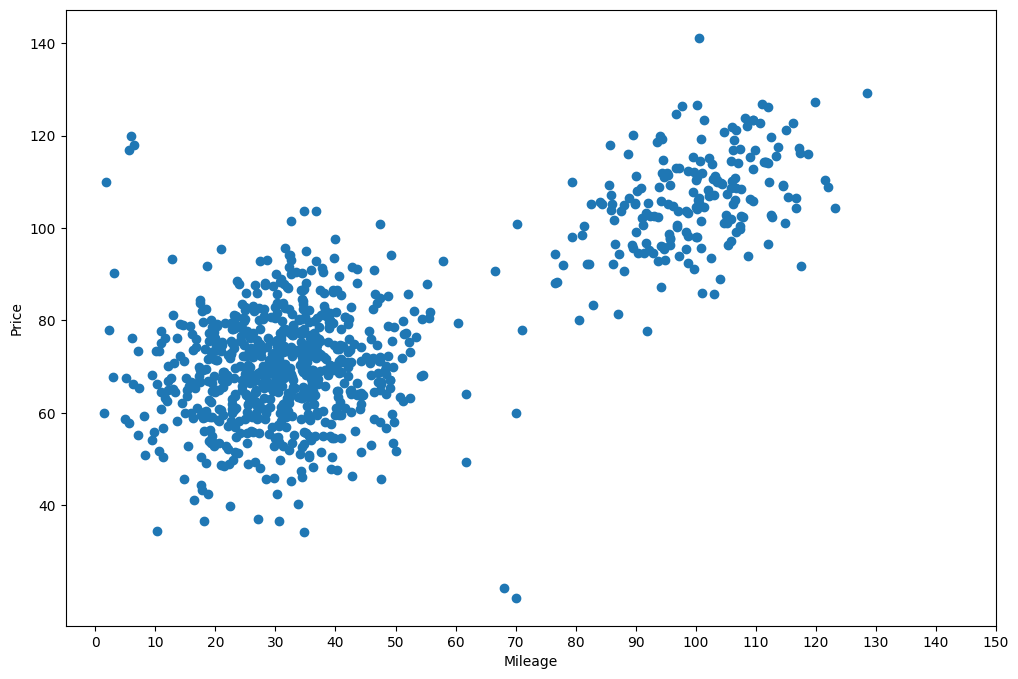

In [ ]:
plt.scatter(df.Mileage, df.Price)
plt.yticks(np.arange(40,160,20))
plt.xticks(np.arange(0,160,10))
plt.xlabel('Mileage')
plt.ylabel('Price')

## **Distribution Based**

Consider a feature $X$ with some observations $x_{1}, x_{2},.... x_{n}$ with some outliers.

We know that $X$ will follow some distribution $D$ which will have parameters $\theta$

- Let $X$ follow a **gaussian distribution** with some mean($\mu$) and standard deviation($\sigma$)

- If we know the distribution of the data, we'll try to fit the distribution.  But, the problem arises with the distribution parameters.

Q. What is hte problem with distribution parameters?

- While we know the distribution, the parameter estimates of the distribution are often corrupted by the noise/outlier

<img src='https://drive.google.com/uc?id=1GMU1-ISqTmYTENEfwpBN3qVfKPL9OSaH'>

##### **Q. How can we robuslty estimate parameters of the distribution?**

We studied RANSAC in the context of removing outliers and we can also use it for this approach as well.
  
  - Imagine we apply RANSAC on $X$ having parameters $\mu$ and $\sigma^2$. Let's call them $\theta$ collectively

  - Now, using $\theta$, we give a score to the point for being an outlier using **$Z$-score**

  - We do this by picking a subset of points $n$ from $N$ total points such that $n<N$.

  - Using $n$ we estimate parameters $\theta_{1}$, and using these parameters we will find outliers with $Z$-score.

  - We remove the outliers and again repeat the whole process until we get the stable estimate

<img src='https://drive.google.com/uc?id=10QZ86Fx9-k5VqX4ynxrVj7t7oq_6_u1p'>

##### **Extending the idea to higher dimensions**

Till now, we assumed that we have only a single feature $X$ which was following
Gaussian Distribution.

Now, imagine we have a **$d$-dimensional** data $X$ where each point $x_{i} \in R^d$ and the data is not labelled.

  - If we know  the datapoints $x_{i}s$ follows multivariate gaussian distribution(unimodal), then $X$ follows normal distribution; $X$ ~ $N(\vec{\mu} , \sum)$, where $\mu$ is mean vector and $\sum$ is a covariance matrix

  - Here we'll consider $(\vec{\mu} , \sum)$ as $\theta$

  - If you remember from GMMS, in multi dimension space, the shape of gaussian was similar to a hill where the density of the points was highest in the middle contour, and it keeps getting low as we move away from the center

  - In this case too, RANSAC can be applied. Farther away a point is from centroid, we'll know that it is an outlier.

<img src='https://drive.google.com/uc?id=1QXDo618jlWTFCOBNOHzUXNRoKT2UEhRH'>

Similar principle is used in another method called **Elliptical Envelope**. Let's see what it is!

**Assessments Covered:**
- https://www.scaler.com/hire/test/problem/24306/
- https://www.scaler.com/hire/test/problem/24382/
- https://www.scaler.com/hire/test/problem/18397/
***

## **Elliptic Envelope**

We know that a Unimodal Multivariate Gaussian Distribution on a single plane will look like ellipses if visualized on a plane. This idea can be extended to find out an outlier

<img src='https://drive.google.com/uc?id=1qtVESt1ZZSz58aywu-ExWJRN38J__acC' height="400">

  - Given some data $X$ where $x_{i}s \in R^d$ and $X$ follows Normal Distribution being unimodal, Elliptical Envelope robustly estimate the parameters $(\vec{\mu}, \sum)$.
  
  - The term robustly means without getting impacted by outliers
  
  - Next, then we remove the points that are outliers which are very far away from the centroid

<img src='https://drive.google.com/uc?id=1wpEFNdF3fLmnHzg3TiF8mwYCyF-2GECr'>

Till now, we've assumed that the points are following Gaussian Distribution, that leads to a question.

#### Q. For non-gaussian, do we need to convert into gaussian distribution?

- While the elliptical envelope method makes an assumption that the distribution is gaussian, the strategy can be applied to any distribution

- As long as we know any distribution and its parameters $\theta$, we can extend our strategy to use RANSAC and estimating parameters $\theta$

- The can be other distributions such as multivariate poissons, multivariate log normals, etc., but we dont use them as much

- One other strategy is to convert them into gaussians but we dont necessarily have to.

- As long as there is any distribution we can calculate the probability of $x_{i} \in X$ using PMF/PDF

<img src='https://drive.google.com/uc?id=1_cY6H9d-I9mu0cpzU9fPzIP6AuNcVeBj'>

#### **sklearn walkthrough**

Scikit-learn implements **EllipticEnvelope** as a part of **covariance** module. Let walkthorugh the parameters that are important
<img src='https://drive.google.com/uc?id=1Gl3Ce6Q4oqdph5XhpVTX5EQeml9uIcv3'>

**1. assume_centered:** It is for assuming that that the data is centered at $0$, i.e. $\vec{\mu} = 0$.

By default, it is set as $False$. If set to $True$, it will just estimate the covariance matrix.

It uses FastMCD approach, and not RANSAC approach. MCD refers to **Minimum Covariance Determinant**

FastMCD performs in a similar way of RANSAC where it takes a subset of points, and using them it tries to estimate the distribution parameters robustly.


**2. support_fraction:** It tells how many points to use to estimate the parameters $(\vec{\mu}, \sum)$

**3. contamination:** It says what  percentage of our data do we think are  outliers.

It takes values from $0$ to $0.5$, where $0.5$ represents that $50$% of our data is noisy. Default assumption value is $0.1$ ~ $10$%

<img src='https://drive.google.com/uc?id=1NmQ8UOi-blHFpYAzUvUSpfuesRzyxj3I'>

#### **Sklearn implementation**

Now we'll create a model EllipticEnvelope with some random state and then fit that model on our data

In [ ]:
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope(random_state=0).fit(df)
ee_pred = cov.predict(df)

In [ ]:
df['is_outlier_ee'] = ee_pred

Passing datapoints to predict whether it is an outlier or an inlier. Return $-1$ if outlier, or else it returns $1$

In [ ]:
cov.predict([[25, 50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


array([1])

Plotting the results of Elliptic Envelope

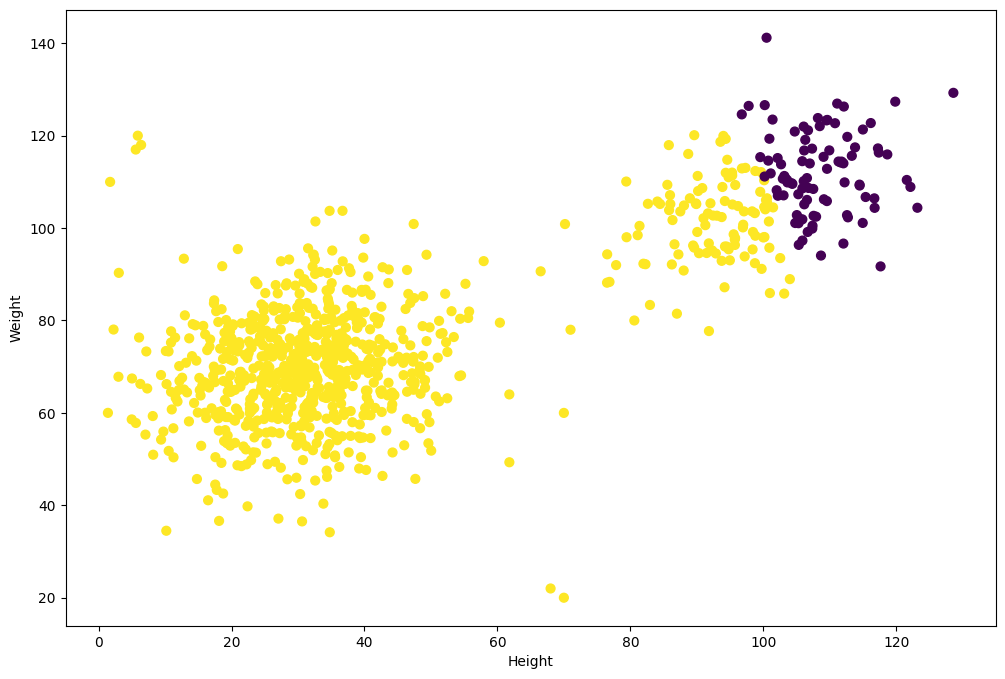

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_ee'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### **Disadvantages**

You might have find the concept of elliptic envelope quite straightforward, but there are limitations.

  - It cannot be used non-unimodal data
  - It is specifically for multivariate gaussians

If the data fails to meet the assumptions of unimodal and multivariate gaussian, the whole things crashes.

### **Isolation Forest**

Consider a dataset $D$ which contatins datapoints $x_{1}, x_{2}...., x_{n}$
Just like Random forests, Isolation Forests builds many trees. Let's see the intition behind Isolation Forest

#### **Intuition**

These are the stpes involved in Isolation Forest:
- Build many trees like random forests
- For each tree:
  - Randomly pick a feature
  - Randomly threshold that feature
  - Build each tree until the leaf consists of only one datapoint

Isolation Forests are also known as **iForests**

Consider the plot along feature $f_{1}$ and $f_{2}$ given below

<img src='https://drive.google.com/uc?id=1M-1zWiqRj0SdzZds9zwbrqtIV4kRrf__'>

In isolation forests, we are building totally random trees. So if we pick feature $f_{1}$ and put a threshold there will be a vertical bar.

Similarly, if we pick feature $f_{2}$ and put a threshold there will be a horizontal bar.

For example, if we pick feature $f_{1}$ and we select threshold as $f_{1} < -1$, then our first root node will be based on this condition

<img src='https://drive.google.com/uc?id=1bAm1mIoNAgAP_RVOHan1gCw31ZYpHnNX'>


**Q. Based on the diagram below, on an average, between $x_{1}$ and $x_{2}$ which node will be at more depth containing?**

  - The node containing $x_{1}$ will be at more depth.
  - Observe that the point $x_{1}$ is in dense region, and point $x_{2}$ is far away
  - That is because, to break the point $x_{1}$ from all the other points, more and more splits will be required and that will increase the depth of the node containing point $x_{1}$

**Q. What is the whole idea behing Isolation Forest?**

So, to sum it up, the idea behind Isolation forest is,
  - On an average **outliers** have **lower depth** in the random trees
  - On an average, **inliers** have **more depth** in the random trees

#### **Evaluation of Isolation Forest**

> **Instructor's Note:**
Below given questions are some good questions were asked by students in previous batch. You can use for interactivity or continue with flow.

#### **Q. How can we evaluate Isolation Forests?**

- Imagine, we have build $100$ random trees. For each point $x_{i}$ in the dataset, we can get an average depth.

- We use this average depth to convert into a metric.

- Apart from this, there are lot of different metrics, that people have came up with over the years

- But, the basic intuition is that lesser the average depth, higher likelihood is there that it is an outlier

#### **Q. But, how do we decide average depth for a point to be classified as an outlier?**

- There is no one metric specifically used for average depths in iForests. At the end, whichever metric you use, it is based on the threshold.

- There are a lot of metrics that researchers have came up with over the years.

- But, studying them in this lecture is out of scope.

#### **Q. But, what if the number of datapoints is large? Wouldn't it mess up the Isolation Forests?**

- iForests can be made on subset of samples.
- We use this subset as train dataset and the rest of the data as test dataset

<img src='https://drive.google.com/uc?id=1g_WcPpDCE-z2pE1QHF5Mz47gAIgst9lI'>

#### **Quiz-3**
```
In isolation forests, on the basis of what do we select a threshold for a split?

a. Gini Impurity
b. Entropy
c. Information Gain
d. Random splits
```
**Answer:**

d. Random splits

#### **Sklearn Implementation**

We can implement Isolation Forest with the help of sklearn's **IsolationForest** method present in **ensemble** module.

Lets see some of the parameters that **IsolationForest** expects

**1. n_estimators:** It represents the number of base learners. By default, the value is set equal to $100$

**2. max_sample:** It is the number of samples to extract from the dataset to build the trees(row sampling). By default the value is set to **auto** and sklearn picks reasonably a good figure for iForests

**3. contamination:** It tells the proportion of outliers in the data. The range is between $[0, 0.5]$

**4. max_features:** It is the number of features to extract from the dataset to build the trees(column sampling).

- To predict whether it is an outlier or an inlier, we pass the new datapoint just as we passed in Elliptic Envelope. It return $-1$ if outlier, or else it returns $1$

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# using same data that we used in Elliptical Envelope -----> X
clf = IsolationForest(random_state=0, contamination = 0.08).fit_predict(df.iloc[:, :-1])
df['is_outlier_if'] = clf

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


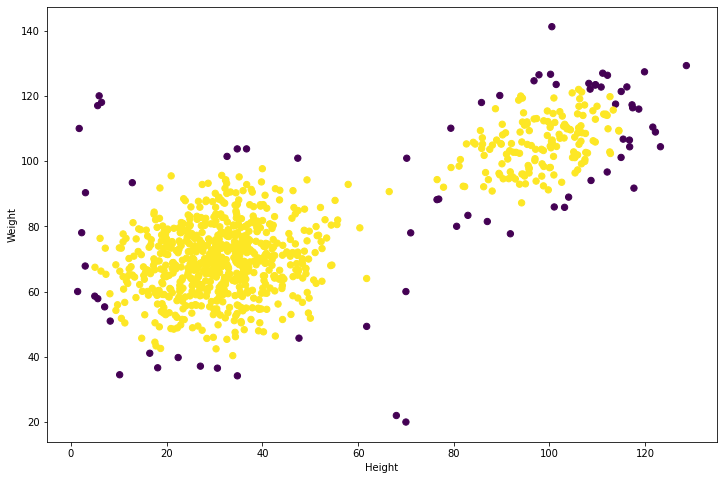

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_if'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Isolation Forests are heavily used when dataset size is very large because algorithms like Elliptical Envelope are typically harder and they have very strong assumptions


#### **Major Disadvantage of Isolation Forest**

**One of the major limitation of iForests is that they are biased towards axis parallel splits.**

iForests makes splits and these splits are always parallel to either of the axis.

Because of this, the boundary will not be smoothed.
  
  - In the diagram given below, the different shades of blue represents the likelihood of a point to be an outlier. Darker the color, it is more likely that the point in that region will be an outlier

  - We've trained iForest model using training data(white points)
  
  - It is tested on testing data(red + green) where red color indicates outliers

<img src='https://drive.google.com/uc?id=15sjw7k2hyq0heM7cIhR0Qf_bzvPs_USL'>

Credits: https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py


Now imagine two points $x_{1}$ and $x_{2}$. $x_{1}$ as shown in the diagram given below.

- Both the points are almost equidistant from nearest cluster. $x_{1}$ is on the axis and point $x_{2}$ is off axis.

- Because the model is biased towards axis, it will classify point $x_{1}$ as an inlier and $x_{2}$ as an outlier

This is also known as banding in signal processing

<img src='https://drive.google.com/uc?id=1zX88A8FH0KdyZaYGPbZzvSFtnqTbzhYq'>

Now, let's see another algorithm, known as "One-Class SVM".

**Assessments Covered:**
- https://www.scaler.com/hire/test/problem/18518/
***

## **One-Class SVM**

There is a whole area of Machine Learning known as **One-Class Classifiers**. The idea is we have a data that consists of only one single class.

Based on this, every datapoint would be considered as inliers and there would not be any outliers.

**Q. So, how will we extract outliers from the data with One-Class SVMs?**

Let's see how One-Class SVMs work

#### **Intuition**

The beauty of the SVMs is the **kernel trick**.
It means that while our data might be of lower dimensions, we can project the data to higher dimensions.

Suppose there are dense datapoints and a few outliers in a dataset as shown below
  - For this we want to find a cenroid $C$ and a smallest hypersphere with radius $r$ which contains most of the points in our dataset

  - For outliers, we allow some distance $\zeta_{i}$ from the boundary of that hypersphere

  - We define $\zeta_{i}$ as:
    - if the distance $d(x_{i}, C) \leq 0$, $\zeta_{i} = 0$
    - otherwise, $\zeta_{i} = $ distance $d(x_{i}, C) - r$, that is the distance of outlier from the boundary of the hypersphere


<img src='https://drive.google.com/uc?id=1aK04ROCv2tHZr68j3Ii8hP4xTQpW6JtJ'>

#### **Optimization**

So, in this case, optimization problem is as follow:
  - we want to find centroid $C$ and radius $r$ and slack variables $\zeta_{i}$s such that:
    - **min $r^2 + \sum_{i=1}^{n}\zeta_{i}$**

**Q. What do we optimize?**
  - We try to include all the points in the hypershpere. So, we want to minimize $\zeta_{i}$s, which means that we want to minimize the outliers

  - We also try to minimize $r^2$, which basically means that we want to compress the sphere as much as possible

  - But, if we keep compressing the sphere, the slack will increase. And hence, there is a tradeoff here

So, we add a hyperparameter $\lambda$ to the equation as follows:
  
  - **min $ r^2 + \lambda\sum_{i=1}^{n}\zeta_{i}$** such that $∀_{i}$ $dist^2(x_{i}, C) \leq r^2 + \zeta_{i}^2$ and $\zeta_{i} \geq 0$

  - This means that for the points where $\zeta_{i} \geq 0$, we label them as outliers

<img src='https://drive.google.com/uc?id=1C2EX5VlxwR_Y6Zd8C6-5peYKaU3Z9J-u'>

#### **Quiz-4**
```
In the optimization of One-class SVMS,  if we kept minimizing radius and ignore the slack variables, the hypershpere will include all the points
and no point will be marked as an outlier. Is the statement True or False?

a. True
b. False
```
**Answer:**

b. False

#### **Kernelization**

If you look at the optimization equations, we do not consider data points $x_{i}s$ anywhere except for $dist^2(x_{i}, C) \leq r^2 + \zeta_{i}^2$

**Q. In which form do $x_{i}s$ exist?**

- We dont need to know what $x{i}s$ and $C$ are, we can kernelize it

Suppose our original data is in $2D$ and we use **RBF-Kernel One-Class SVM**.

This will transform the data into any high dimension space and will give any complex shape

All we know is that it is some hypersphere in some high dimension space, while in 2D space, it can take any shape

<img src='https://drive.google.com/uc?id=1fiSI2ByV5qOn4q_WVFbdwerRdLtN0r1z'>

You might be curious about how One-Class SVM's results look like. Lets see it

In the plot given below, you can see how One-Class SVMs can get complex shapes and how well it handles the outliers (yellow points)

<img src='https://drive.google.com/uc?id=1W80kAWZj24EEpCcOofMzSukjPY2JfHgv'>



In [ ]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel = 'rbf', gamma = 0.1, nu = 0.03).fit_predict(df.iloc[:, :2])
df['is_outlier_svm'] = ocsvm

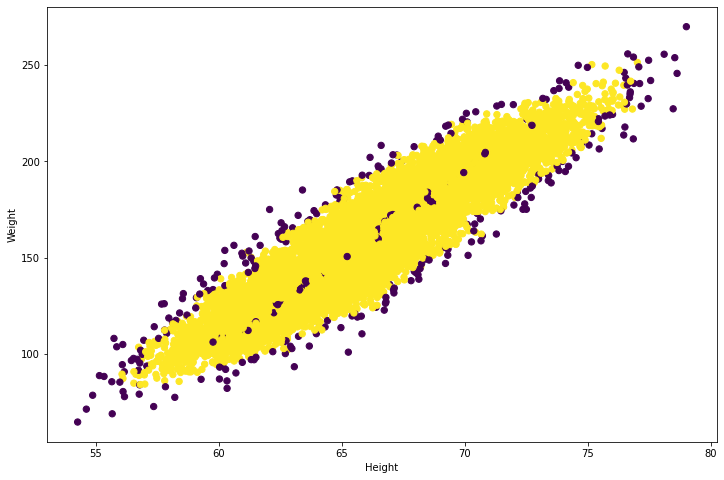

In [ ]:
plt.scatter(df['Height'], df['Weight'], s=40, c=df['is_outlier_svm'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### **Disdvantages of One-Class SVMs**

As good as One-Class SVMs might sound, they have some limitations.
They are:

- Kernel Selection (RBF: default)
- As the number of datapoints ($n$) increases, time complexity increases
- All disadvantages of SVMs

With this, lets move to one last algorithm, Local Outlier Factor.
***